In [1]:
import mglearn

#### 想要度量人脸的相似度，计算原始像素空间中的距离是一种相当糟糕的方法。用像素表示来比较两张图像时，我们比较的是每个像素的灰度值与另一张图像对应位置的像素灰度值。这种表示与人们对人脸图像的解释方式有很大不同，使用这种原始表示很难获取到面部特征。例如，如果使用像素距离，那么将人脸向右移动一个像素将会发生巨大的变化，得到一个完全不同的表示。我们希望，使用沿着主成分方向的距离可以提高精度。这里我们启用 PCA 的白化 （whitening）选项，它将主成分缩放到相同的尺度。变换后的结果与使用 StandardScaler 相同。再次使用图 3-3 中的数据，白化不仅对应于旋转数据，还对应于缩放数据使其形状是圆形而不是椭圆

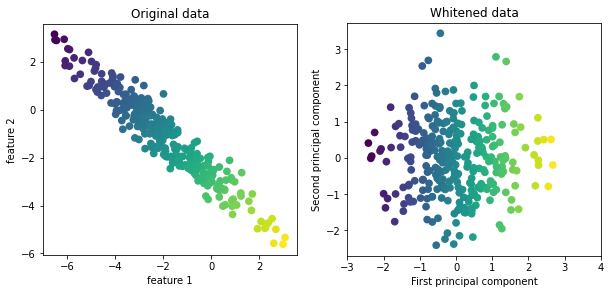

In [2]:
mglearn.plots.plot_pca_whitening()

In [3]:
import warnings

#### 非负矩阵分解（non-negative matrix factorization，NMF）是另一种无监督学习算法，其目的在于提取有用的特征。它的工作原理类似于 PCA，也可以用于降维。与 PCA 相同，我们试图将每个数据点写成一些分量的加权求和，正如图 3-10 所示。但在 PCA 中，我们想要的是正交分量，并且能够解释尽可能多的数据方差；而在 NMF 中，我们希望分量和系数均为非负，也就是说，我们希望分量和系数都大于或等于 0。因此，这种方法只能应用于每个特征都是非负的数据，因为非负分量的非负求和不可能变为负值。

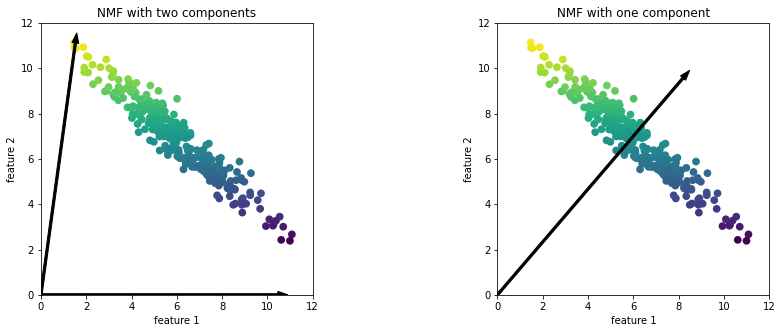

In [4]:
warnings.filterwarnings("ignore")
mglearn.plots.plot_nmf_illustration()

In [5]:
from matplotlib import pyplot as plt

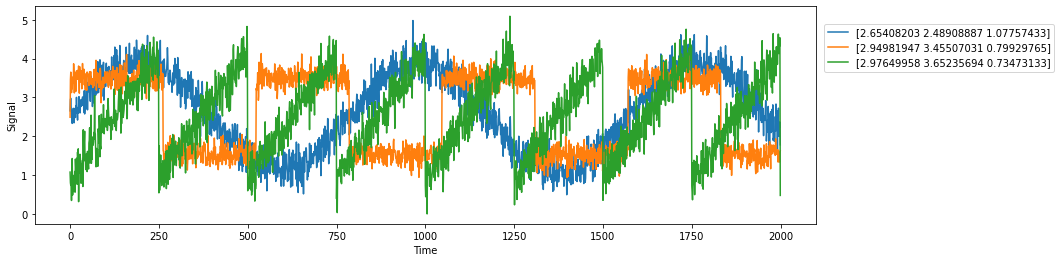

In [6]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(14, 4))
plt.plot(S, '-')
plt.xlabel("Time")
plt.ylabel("Signal")
plt.legend(S,loc=(1.01, 0.7))
plt.show()

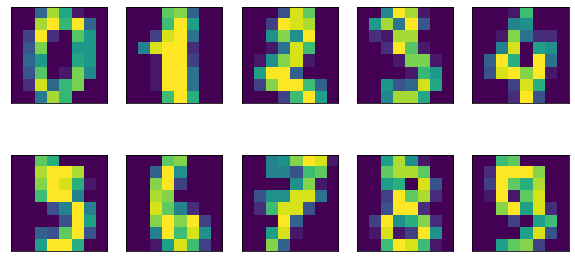

In [7]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

In [8]:
from sklearn.decomposition import PCA

In [9]:
digits.data.shape

(1797, 64)

In [10]:
len(digits.data)

1797

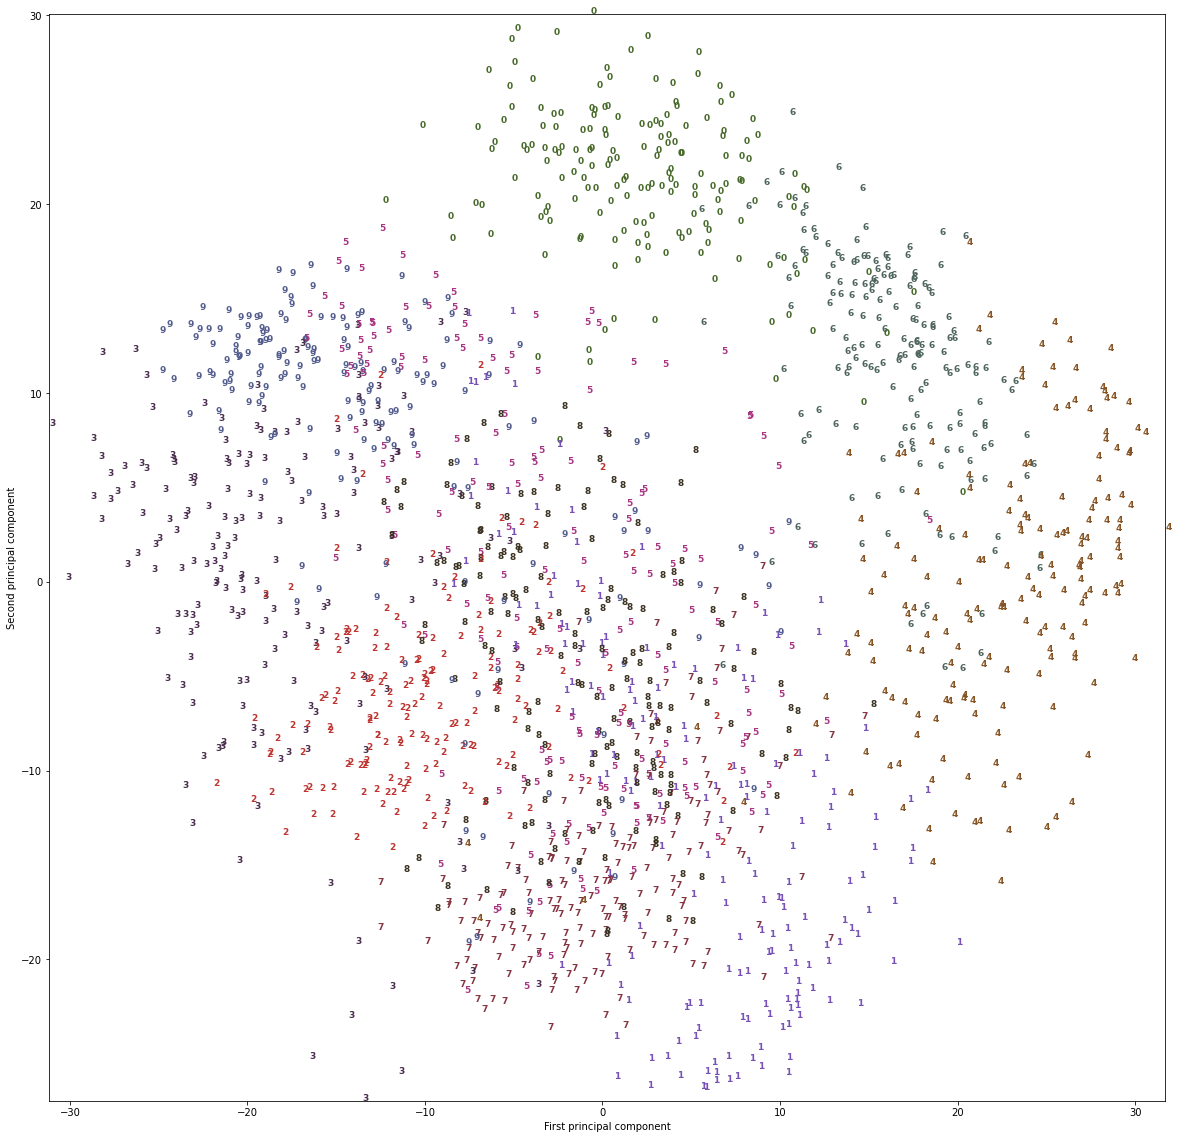

In [11]:
# 构建一个PCA模型
pca = PCA(n_components=2)
pca.fit(digits.data)
# 将digits数据变换到前两个主成分的方向上
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(20, 20))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # 将数据实际绘制成文本，而不是散点
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()

In [12]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# 使用fit_transform而不是fit，因为TSNE没有transform方法
digits_tsne = tsne.fit_transform(digits.data)

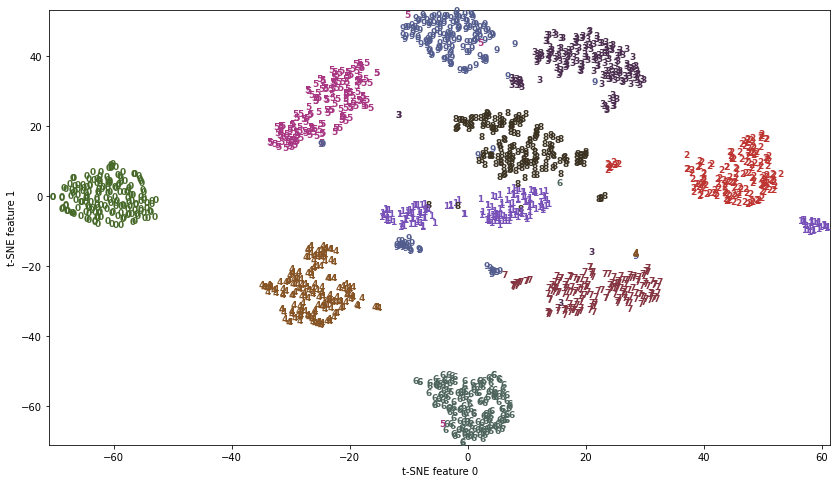

In [13]:
plt.figure(figsize=(14, 8))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # 将数据实际绘制成文本，而不是散点
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")
plt.show()